In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.1.0


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [3]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b vanilla sky is a 2001 remake of the 1997 movie <OOV> los <OOV> open your eyes and in my opinion a much more human and emotional version tom cruise plays david <OOV> a selfish <OOV> who takes other people's emotions for granted and thinks only of himself jason lee plays brian <OOV> <OOV> best and in many ways only friend penelope <OOV> plays <OOV> <OOV> <OOV> girlfriend whom <OOV> him to <OOV> birthday party cameron diaz plays julie <OOV> <OOV> occasional bed buddy kurt russell plays dr curtis <OOV> a psychologist <OOV> david all of their interactions and the consequences of them make vanilla sky one of the most emotional and complex thrillers ever made i won't explain anymore
b"Vanilla Sky is a 2001 remake of the 1997 movie Abre Los Ojos (Open Your Eyes). And in my opinion, a much more human and emotional version. Tom Cruise plays David Aames, a selfish egomaniac who takes other people's emotions for granted, and thinks only of himself. Jason Lee plays Brian Shelby, David's best, and

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 85s 3ms/sample - loss: 0.1107 - accuracy: 0.9595 - val_loss: 0.5816 - val_accuracy: 0.8099
Epoch 2/10
25000/25000 [==============================] - 112s 4ms/sample - loss: 0.0819 - accuracy: 0.9727 - val_loss: 0.6563 - val_accuracy: 0.8125
Epoch 3/10
25000/25000 [==============================] - 90s 4ms/sample - loss: 0.0631 - accuracy: 0.9780 - val_loss: 0.7550 - val_accuracy: 0.8141
Epoch 4/10
25000/25000 [==============================] - 97s 4ms/sample - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.8482 - val_accuracy: 0.8104
Epoch 5/10
25000/25000 [==============================] - 107s 4ms/sample - loss: 0.0401 - accuracy: 0.9865 - val_loss: 0.9112 - val_accuracy: 0.8111
Epoch 6/10
25000/25000 [==============================] - 94s 4ms/sample - loss: 0.0332 - accuracy: 0.9886 - val_loss: 1.0200 - val_accuracy: 0.7957
Epoch 7/10
25000/25000 [==============================

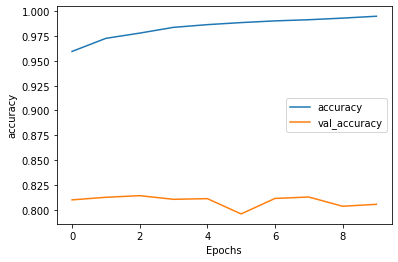

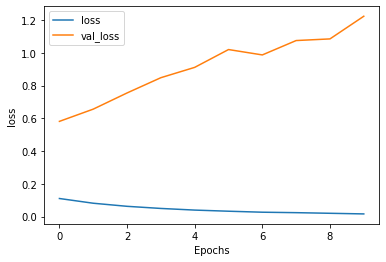

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [18]:
# Model Definition with LSTM
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 10
history2 = model2.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 92s 4ms/sample - loss: 0.6296 - accuracy: 0.6419 - val_loss: 0.4289 - val_accuracy: 0.8206
Epoch 2/10
25000/25000 [==============================] - 89s 4ms/sample - loss: 0.3746 - accuracy: 0.8446 - val_loss: 0.3850 - val_accuracy: 0.8375
Epoch 3/10
25000/25000 [==============================] - 92s 4ms/sample - loss: 0.2762 - accuracy: 0.8932 - val_loss: 0.3762 - val_accuracy: 0.8324
Epoch 4/10
25000/25000 [==============================] - 84s 3ms/sample - loss: 0.2278 - accuracy: 0.9153 - val_loss: 0.4472 - val_accuracy: 0.8408
Epoch 5/10
25000/25000 [==============================] - 90s 4ms/sample - loss: 0.1865 - accuracy: 0.9342 - val_loss: 0.4654 - val_accuracy: 0.8326
Epoch 6/10
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.1604 - accuracy: 0.9442 - val_loss: 0.5407 - val_accuracy: 0.8232
Epoch 7/10
25000/25000 [==============================]

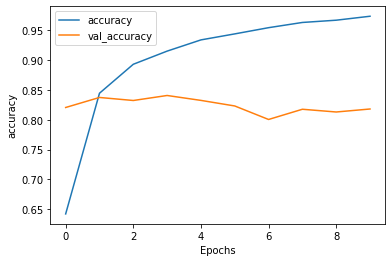

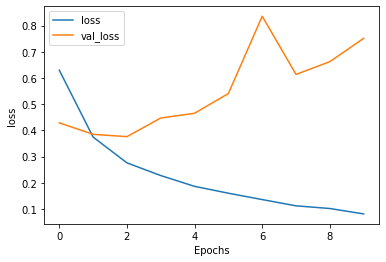

In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history2, 'accuracy')
plot_graphs(history2, 'loss')

In [21]:
# Model Definition with Conv1D
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 10
history3 = model3.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 24s 964us/sample - loss: 0.4477 - accuracy: 0.7804 - val_loss: 0.3512 - val_accuracy: 0.8473
Epoch 2/10
25000/25000 [==============================] - 21s 824us/sample - loss: 0.2791 - accuracy: 0.8851 - val_loss: 0.3547 - val_accuracy: 0.8446
Epoch 3/10
25000/25000 [==============================] - 19s 746us/sample - loss: 0.2271 - accuracy: 0.9100 - val_loss: 0.3857 - val_accuracy: 0.8374
Epoch 4/10
25000/25000 [==============================] - 19s 779us/sample - loss: 0.1930 - accuracy: 0.9277 - val_loss: 0.4239 - val_accuracy: 0.8293
Epoch 5/10
25000/25000 [==============================] - 19s 766us/sample - loss: 0.1607 - accuracy: 0.9418 - val_loss: 0.4558 - val_accuracy: 0.8287
Epoch 6/10
25000/25000 [==============================] - 20s 803us/sample - loss: 0.1341 - accuracy: 0.9542 - val_loss: 0.5111 - val_accuracy: 0.8238
Epoch 7/10
25000/25000 [====================

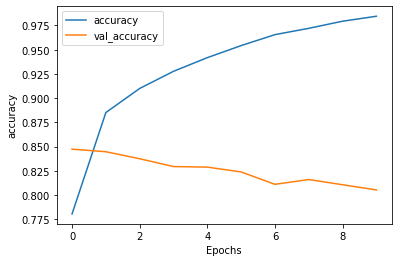

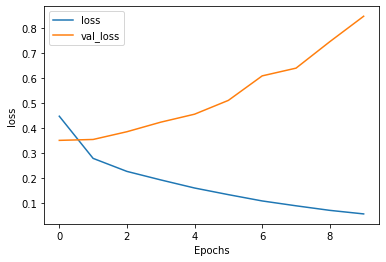

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history3, 'accuracy')
plot_graphs(history3, 'loss')

In [28]:
model4=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 128)         41472     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 246,913
Trainable params: 246,913
Non-trainable params: 0
_________________________________________________________________


In [29]:
num_epochs = 10
history4 = model4.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 270s 11ms/sample - loss: 0.4744 - accuracy: 0.7612 - val_loss: 0.3790 - val_accuracy: 0.8334
Epoch 2/10
25000/25000 [==============================] - 237s 9ms/sample - loss: 0.3071 - accuracy: 0.8780 - val_loss: 0.3977 - val_accuracy: 0.8360
Epoch 3/10
25000/25000 [==============================] - 240s 10ms/sample - loss: 0.2459 - accuracy: 0.9061 - val_loss: 0.3799 - val_accuracy: 0.8293
Epoch 4/10
25000/25000 [==============================] - 243s 10ms/sample - loss: 0.2033 - accuracy: 0.9276 - val_loss: 0.4240 - val_accuracy: 0.8323
Epoch 5/10
25000/25000 [==============================] - 188s 8ms/sample - loss: 0.1666 - accuracy: 0.9416 - val_loss: 0.5211 - val_accuracy: 0.8124
Epoch 6/10
25000/25000 [==============================] - 190s 8ms/sample - loss: 0.1369 - accuracy: 0.9540 - val_loss: 0.4710 - val_accuracy: 0.8231
Epoch 7/10
25000/25000 [=======================

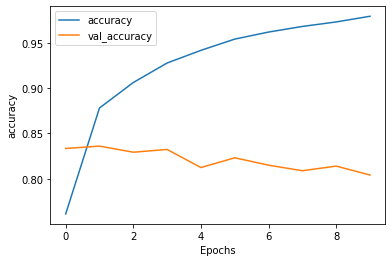

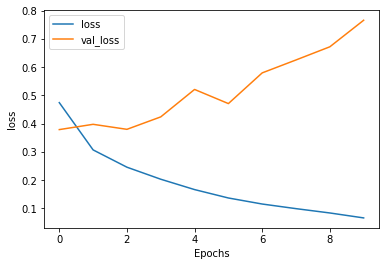

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history4, 'accuracy')
plot_graphs(history4, 'loss')